In [176]:
%cd /home/denis/git/dev/ice_drift_pc_ncc/tools/s1_proc

/home/denis/git/dev/ice_drift_pc_ncc/tools/s1_proc


/home/denis/.conda/envs/geo_env/lib/python3.12/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [ ]:
from S1_processing imort *

In [172]:
# Open L1 zip file
#s1 = dataSentinel1('/data/rrs/seaice/aux_data/s1/SW_kara/zip/S1A_EW_GRDM_1SDH_20150407T124924_20150407T125028_005378_006D48_A3C6.zip')
s1 = dataSentinel1('/data/rrs/seaice/aux_data/s1/test/S1A_IW_GRDH_1SDV_20241028T211457_20241028T211522_056308_06E57E_4076.zip')

# Extract metadata
s1.extract_metadata()

# Define clipping values in dB for each polarization 
# or skip it
clip_pars = {'hh': {'db_min': -25, 'db_max': 0},
             'hv': {'db_min': -25, 'db_max': -10},
             'vv': {'db_min': -22, 'db_max': 0},
             'vh': {'db_min': -25, 'db_max': -10}}

# Calibrate
s1.calibrate_data(clip=clip_pars)

/data/rrs/seaice/aux_data/s1/test/S1A_IW_GRDH_1SDV_20241028T211457_20241028T211522_056308_06E57E_4076.zip will be processed.
search dir: tempdir/S1A_IW_GRDH_1SDV_20241028T211457_20241028T211522_056308_06E57E_4076.SAFE/measurement
tempdir/S1A_IW_GRDH_1SDV_20241028T211457_20241028T211522_056308_06E57E_4076.SAFE/measurement/s1a-iw-grd-vv-20241028t211457-20241028t211522-056308-06e57e-001.tiff
tempdir/S1A_IW_GRDH_1SDV_20241028T211457_20241028T211522_056308_06E57E_4076.SAFE/measurement/s1a-iw-grd-vh-20241028t211457-20241028t211522-056308-06e57e-002.tiff
reading data...
interpolating data...
reading data...
interpolating data...

Calibrating tempdir/S1A_IW_GRDH_1SDV_20241028T211457_20241028T211522_056308_06E57E_4076.SAFE/measurement/s1a-iw-grd-vv-20241028t211457-20241028t211522-056308-06e57e-001.tiff


/tmp/ipykernel_13694/3443875490.py:136: RuntimeWarning: divide by zero encountered in log10
  sz_dB = 10. * np.log10(sz)



Clipping in {'db_min': -22, 'db_max': 0}
Done.

Calibrating tempdir/S1A_IW_GRDH_1SDV_20241028T211457_20241028T211522_056308_06E57E_4076.SAFE/measurement/s1a-iw-grd-vh-20241028t211457-20241028t211522-056308-06e57e-002.tiff

Clipping in {'db_min': -25, 'db_max': -10}
Done.


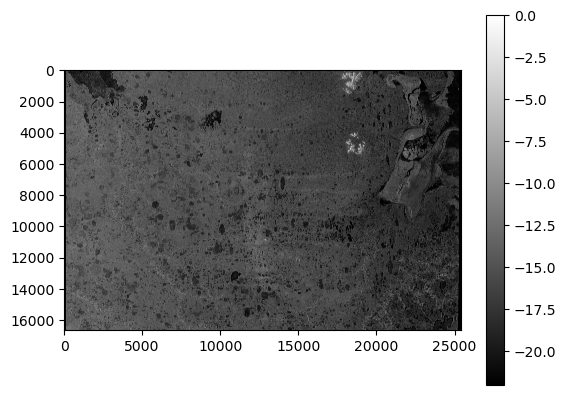

In [173]:
# Plot the calibrated VV data (expected to be in the range [-22, 0] dB)
import matplotlib.pyplot as plt
plt.imshow(s1.pols['vv']['lut_sz_2D_dB'], cmap='gray')
plt.colorbar()

In [174]:
# Project data at original resolution onto the Arctic stereographic projection (3995)
s1.export_projected_geotiff(output_path='/data/rrs/seaice/aux_data/s1_tests', epsg=3995)

### Open input file: /data/rrs/seaice/aux_data/s1_tests/S1A_IW_GRDH_1SDV_20241028T211457_20241028T211522_056308_06E57E_4076_vv.tiff
100 - done.
0...10...20...30...40...50...60...70...80...90...Done.
### Open input file: /data/rrs/seaice/aux_data/s1_tests/S1A_IW_GRDH_1SDV_20241028T211457_20241028T211522_056308_06E57E_4076_vh.tiff
100 - done.
0...10...20...30...40...50...60...70...80...90...Done.


In [175]:
# Delete temp files
s1.delete_temp()

### S1A_IW_GRDH_1SDV_20241028T211457_20241028T211522_056308_06E57E_4076.SAFE
